Ce notebook provient (en grande partie) de : http://dspillustrations.com/pages/posts/misc/convolution-examples-and-the-convolution-integral.html

# Convolution Examples and the Convolution Integral

In this notebook, we will illustrate the convolution operation. The convolution of two signals is a fundamental operation in signal processing. Mainly, because the output of any linear time-invariant (LTI) system is given by the convolution of its impulse response with the input signal. Another important application of convolution is the [convolution theorem](http://dspillustrations.com/pages/posts/misc/the-convolution-theorem-and-application-examples.html), which states that multiplication in time-domain corresponds to convolution in frequency domain and vice versa. 

In this notebook, we will illustrate the operation of convolution and how we can calculate it numerically. Formally, the convolution $(f_1*f_2)(t)$ of two signals $f_1(t)$ and $f_2(t)$ is defined by the convolution integral

$$
(f_1*f_2)(t) = \int_{-\infty}^{\infty}f_1(\tau)f_2(t-\tau)d\tau.
$$

So, the convolution of two function is the integral over the product of both functions, where one function is time-shifted and flipped in time. 

## Relation with the (inter-)correlation function ##

You can prove in a rather simple way that $R_{xy}(\tau) = x(\tau) \ast y^*(-\tau)$

Indeed :

$$ \begin{array}{rcl}
R_{xy}(\tau) & = & \displaystyle \int_{-\infty}^\infty x(t) y^*(t-\tau) dt \\
  & = & \displaystyle \int_{-\infty}^\infty x(t) y^*(-(\tau-t)) dt \\
  & = & x(\tau) \ast y^*(-\tau).
\end{array}$$


## Example

Let us not think about why this operation makes sense for now. Instead, let's define two functions $f_1(t)$ and $f_2(t)$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%load_ext tikzmagic

import scipy.integrate

from matplotlib import animation
from IPython.display import HTML, display
from ipywidgets import interact

%matplotlib inline
import matplotlib; matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['animation.writer'] = 'avconv'

In [2]:
f1 = lambda t: np.maximum(0, 1-abs(t))
f2 = lambda t: (t>0) * np.exp(-2*t)

Let's plot these two functions to see how they look like:

In [3]:
Fs = 50  # our sampling frequency for the plotting
T = 5    # the time range we are interested in
t = np.arange(-T, T, 1/Fs)  # the time samples

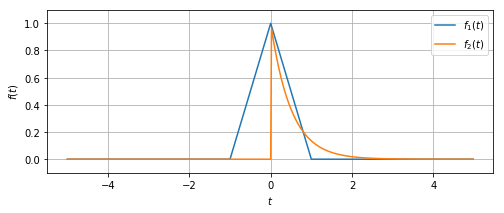

In [4]:
plt.figure(figsize=(8,3))
plt.plot(t, f1(t), label='$f_1(t)$')
plt.plot(t, f2(t), label='$f_2(t)$')
plt.grid(True); plt.ylabel('$f(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=10); plt.ylim((-0.1, 1.1));

So, we see one function is a triangle, the other is the exponential impulse. Let us now evaluate the convolution integral at a given time $t_0=1$:

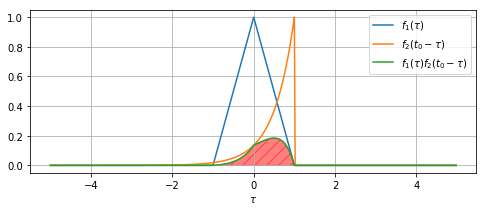

In [5]:
t0 = 1
flipped = lambda tau: f2(t0-tau)
product = lambda tau: f1(tau)*f2(t0-tau)

plt.figure(figsize=(8,3))
plt.gca().set_ymargin(0.05);
plt.plot(t, f1(t), label=r'$f_1(\tau)$')
plt.plot(t, flipped(t), label=r'$f_2(t_0-\tau)$')
plt.plot(t, product(t), label=r'$f_1(\tau)f_2(t_0-\tau)$')
plt.fill(t, product(t), color='r', alpha=0.5, hatch='//')
plt.grid(True); plt.xlabel(r'$\tau$'); plt.legend(fontsize=10);

# Explicitely calculate the integral, using the Simpson integration rule
display(HTML("Result of the convolution (red shaded area): $(f_1*f_2)(t_0=%.0f) = %.2f$" % (t0, scipy.integrate.simps(product(t), t))))

As we see, the green curve $f_2(t_0-\tau)$ was shifted by $t_0$ to the right, and then horizontally mirrored. The value of the convolution integral corresponds to the red shaded area, which is the product of both curves. 

We can now write a small function which illustrates the convolution integral for different time-shifts.

In [6]:
def showConvolution(f1, f2, t0):
    # Calculate the overall convolution result using Simpson integration
    convolution = np.zeros(len(t))
    for n, t_ in enumerate(t):
        prod = lambda tau: f1(tau) * f2(t_-tau)
        convolution[n] = scipy.integrate.simps(prod(t), t)
    
    # Create the shifted and flipped function
    f_shift = lambda t: f2(t0-t)
    prod = lambda tau: f1(tau) * f2(t0-tau)

    # Plot the curves
    plt.gcf().clear()
    
    plt.subplot(211)
    plt.gca().set_ymargin(0.05)
    plt.plot(t, f1(t), label=r'$f_1(\tau)$')
    plt.plot(t, f_shift(t), label=r'$f_2(t_0-\tau)$')
    plt.fill(t, prod(t), color='r', alpha=0.5, edgecolor='black', hatch='//')
    plt.plot(t, prod(t), 'r-', label=r'$f_1(\tau)f_2(t_0-\tau)$')
    plt.grid(True); plt.xlabel(r'$\tau$'); plt.ylabel(r'$x(\tau)$')
    plt.legend(fontsize=10)
    plt.text(-4, 0.6, '$t_0=%.2f$' % t0, bbox=dict(fc='white'))
    
    # plot the convolution curve
    plt.subplot(212)
    plt.gca().set_ymargin(0.05)
    plt.plot(t, convolution, label='$(f_1*f_2)(t)$')
    
    # recalculate the value of the convolution integral at the current time-shift t0
    current_value = scipy.integrate.simps(prod(t), t)
    plt.plot(t0, current_value, 'ro')  # plot the point
    plt.grid(True); plt.xlabel('$t$'); plt.ylabel('$(f_1*f_2)(t)$')
    plt.legend(fontsize=10)
    plt.show()

In [7]:
plt.figure()
interact(lambda t0: showConvolution(f1, f2, t0), t0 = (-2,3,0.05));

A Jupyter Widget

The animation shows, how the green function is gradually shifted to the right, producing more and more overlap between both curves and hence increasing the area under their product. Then, when the green curve is shifted even more to the right, we see that the area under their product decreases again. 

Another important property can be seen from the convolution output: Even though the green input signal has a sharp jump at $t=0$, the convolution of both functions is a smooth function. In particular, this property is due to the integral in the convolution calculation: The integral somehow creates a moving average filter, which cannot create immediate jumps in the output signal (as long as the input does not contain Dirac-impulses). So, a general property of the convolution, is the fact that the convolution product of two functions is always a smoother curve than the input signals.

Let us now look at the classical example for convolution explanation: The convolution of a rectangular function with itself. Here, the result is a triangle with a maximum, when both rectangles perfectly overlap:

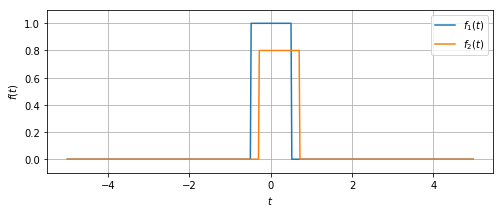

In [8]:
f1 = lambda t: (abs(t)<0.5).astype(float)
f2 = lambda t: 0.8*(abs(t-0.2)<0.5).astype(float)
plt.figure(figsize=(8,3))
plt.plot(t, f1(t), label='$f_1(t)$')
plt.plot(t, f2(t), label='$f_2(t)$')
plt.grid(True); plt.ylabel('$f(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=10); plt.ylim((-0.1, 1.1));

In [9]:
interact(lambda t0: showConvolution(f1, f2, t0), t0 = (-2,3,0.05));

A Jupyter Widget

Let us finally look at the convolution of an exponentially decaying impulse with a switched-on sine wave. If we understand the blue graph as the impulse response of some LTI system and the green curve as its input signal, then the convolution of both is the output of the signal to this particular input. 

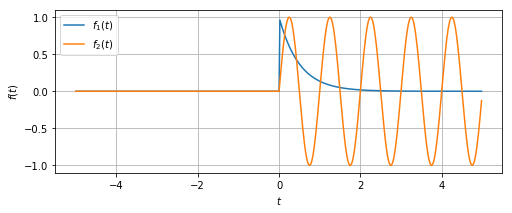

In [10]:
f1 = lambda t: (t>0) * np.exp(-2*t)
f2 = lambda t: np.sin(2*np.pi*t) * (t>0)
plt.figure(figsize=(8,3))
plt.plot(t, f1(t), label='$f_1(t)$')
plt.plot(t, f2(t), label='$f_2(t)$')
plt.grid(True); plt.ylabel('$f(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=10); plt.ylim((-1.1, 1.1));

We see that the impulse response (blue) is causal, i.e. $f_1(t)=0, t<0$. Since the sine-wave is switched on at $t=0$, the output of the system is zero before switching on the signal. Then, after some transient phase, the output of the system becomes a sine-wave with the same frequency but with a different phase and amplitude. This is the fundamental property of LTI systems: The response of an LTI system to a harmonic is a harmonic of the same frequency, but (possibly) with different phase and amplitude. We also say, harmonics are eigenfunctions of the LTI system. Hence, in particular harmonics are eigenfunctions of the convolution integral.

In [11]:
interact(lambda t0: showConvolution(f1, f2, t0), t0 = (-2,3,0.05));

A Jupyter Widget

## About the "impulse response"
A classical question is to know the resonse of a system to an impulse (to a "dirac" function).  The answer to this is quite straightforward, if you take $f_1(t)=\delta(t) $ as a dirac, then, the convolution of $f_1(t)=\delta(t) $ with $f_2(t)$ gives $f_2(t)$.  This is illustrated below with an approximate dirac function.

Hence, $f_2(t)$ can be considered as the TRANSFER FUNCTION of a system whose IMPULSE RESPONSE is $f_2(t)$.  This IMPULSE RESPONSE is usually denoted as $h(t)$.

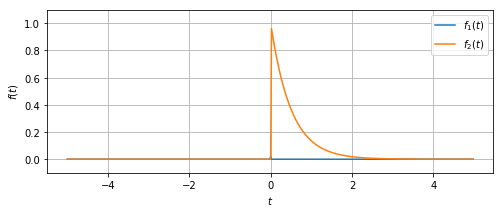

In [12]:
a=.01
f1 = lambda t: (abs(t)<a).astype(float)
f2 = lambda t: (t>0) * np.exp(-2*t)
plt.figure(figsize=(8,3))
plt.plot(t, 2*a*f1(t), label='$f_1(t)$')
plt.plot(t, f2(t), label='$f_2(t)$')
plt.grid(True); plt.ylabel('$f(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=10); plt.ylim((-0.1, 1.1));

In [13]:
plt.figure()
interact(lambda t0: showConvolution(f1, f2, t0), t0 = (-2,3,0.05));

A Jupyter Widget

## Conclusion
> - The convolution operation is given by the integral over the product of two functions, where one function is flipped and shifted in time.
> - The convolution operation smoothes the input signals, i.e. the output of the convolution is a more smooth function that its input functions.
> - Harmonic functions (i.e. sine, cosine) are the eigenfunctions of the convolution operation.  This means convolving a sine with some function yields in a sine of different amplitude and phase, but same frequency.

# Discrete signals : Convolution
For discrete signals, the convolution integral becomes a convolution product : consider a signal $x(n)$ and a signal $h(n)$ (or equivalently a system whose impulse response is $h(n)$), the convolution product can be defined as :

$y(n) = \displaystyle \sum_{k=-\infty}^{k=\infty} x(k). h(n-k) = \sum_{k=-\infty}^{k=\infty} k(k) .x(n-k)$

The following example also illustrates the fact that $h(n)$ is indeed the impulse response !

Text(0.5,1,'$y(n)=h(n)$')

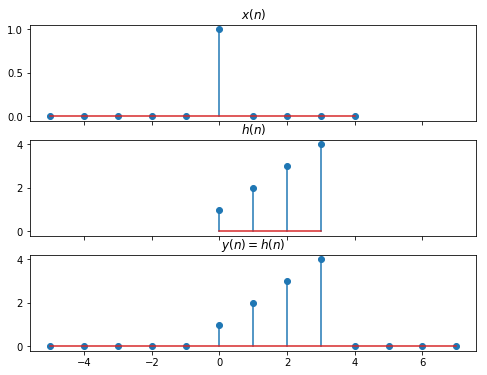

In [14]:
from scipy import signal
x=np.zeros(10)
x[5]=1
h=np.arange(1,5)
y=signal.convolve(x,h)
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)

ax_orig.stem(np.arange(-5,5),x)
ax_orig.set_title('$x(n)$')
ax_win.stem(h)
ax_win.set_title('$h(n)$')
ax_filt.stem(np.arange(-5,8),y)
ax_filt.set_title('$y(n)=h(n)$')
